# Author:Anand Maurya

## Task :5 Exploratory Data Analysis - Sports
   - Perform "Exploratory Data Analysis" on dataset "indian premium league"
   - As a sports analysis, find out the most succesfull teams, players and factors cotributing win or loss of a team.
   - suggest team or player a company shoud endorse for its products.
   - tools used python
   - dataset: https://bit.ly/34SRn3b

## Importing libraries

In [391]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # seaborn for visualizationn
import matplotlib.pyplot as plt  # for visualization
%matplotlib inline
#This is known as magic inline function.
#When using the 'inline' backend, our matplotlib graphs will be included in our notebook, next to the code.
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading

In [392]:
#Reading Datasets
matches_df=pd.read_csv("https://raw.githubusercontent.com/coderanandmaurya/EDA-IPL-TEAM/main/matches.csv")
deliveries_df=pd.read_csv("https://raw.githubusercontent.com/coderanandmaurya/EDA-IPL-TEAM/main/deliveries.csv")

In [393]:
#Take a copy of the original dataframe and play in the copied version.
matches = matches_df.copy()
deliveries = deliveries_df.copy()

## 3. Exploratory Data Analysis (EDA)

### 3.1. Understanding Variables and DataFrame

In [394]:
matches.shape  #Rows X Columns

(756, 18)

In [395]:
matches_df.head(3)  #first 3 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [396]:
deliveries.shape  #Rows X Columns

(179078, 21)

In [397]:
deliveries_df.head(3) #first 3 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [398]:
matches.info() # Know about the columns, data types, total rows, number of not null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [399]:
deliveries.info() # Know about the columns, data types, total rows, number of not null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## 3.2 Data Pre-Processing or Data Cleaning

### 3.2.1. Missing Values

In [400]:
#count of missing values in columns having any missing values
matches.isnull().sum().sort_values(ascending=False)

umpire3            637
city                 7
player_of_match      4
winner               4
umpire1              2
umpire2              2
toss_winner          0
season               0
date                 0
team1                0
team2                0
result               0
toss_decision        0
dl_applied           0
win_by_runs          0
win_by_wickets       0
venue                0
id                   0
dtype: int64

In [401]:
#percentage of missing values in columns having any missing values
((matches[matches.columns[matches.isnull().any()]].isnull().sum()* 100).sort_values(ascending=False)/(len(matches)))

umpire3            84.259259
city                0.925926
player_of_match     0.529101
winner              0.529101
umpire2             0.264550
umpire1             0.264550
dtype: float64

In [402]:
#dropping umpire column umpire3 having 84.2 Percent missing values
matches.drop(['umpire3'], axis=1, inplace=True) 

### for city column we use external source to get data and we found that the missing value is dubai so i am going to replace the nan value to dubai

In [403]:
#fetching data where city=nan with corresponding data date and season
matches[matches.city.isnull()][["city","date","season"]]

,city,date,season
461,NaN,2014-04-19,2014
462,NaN,2014-04-19,2014
466,NaN,2014-04-23,2014
468,NaN,2014-04-25,2014
469,NaN,2014-04-25,2014
474,NaN,2014-04-28,2014
476,NaN,2014-04-30,2014


In [404]:
matches["city"]=matches["city"].fillna("Dubai")

In [405]:
matches["city"].isnull().sum()

0

In [406]:
#fetching data having nan value in Player_of_match column from this we have seen winner and result have also nan value so i am going to drop row no.300,545,570,744  
matches[matches.winner.isnull()][["player_of_match","winner","result"]]

,player_of_match,winner,result
300,NaN,NaN,no result
545,NaN,NaN,no result
570,NaN,NaN,no result
744,NaN,NaN,no result


In [407]:
#matches.drop([300,545,570,744],inplace = True)

In [408]:
#let see the deliveries dataframe and check the missing value
deliveries.isnull().sum().sort_values(ascending=False)

fielder             172630
player_dismissed    170244
dismissal_kind      170244
bowler                   0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
wide_runs                0
is_super_over            0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
match_id                 0
dtype: int64

In [409]:
#percentage of missing values in columns having any missing values
((deliveries[deliveries.columns[deliveries.isnull().any()]].isnull().sum()*100).sort_values(ascending=False)/(len(deliveries)))

fielder             96.399334
dismissal_kind      95.066954
player_dismissed    95.066954
dtype: float64

In [410]:
deliveries.drop(["fielder","dismissal_kind","player_dismissed"], axis=1, inplace=True)

In [411]:
matches["winner"].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

#### in data there is some typing mistake Rising Pune Supergiant and Rising Pune Supergiants are same so i am going to replace Rising Pune Supergiants to Rising Pune Supergiant using replace 


In [412]:
matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants",inplace=True)

# 4. Task

##  4.1.1  Season, Teams, Matches

### TOTAL NUMBER OF MATCH IN SEASON

In [413]:
def result(matches,variable):
    hal=matches[variable].value_counts()
    print(hal)
    n= len(pd.unique(matches[variable]))
    print(f'Total number of {variable} are {n}.')
    
result(matches,"season")

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64
Total number of season are 12.


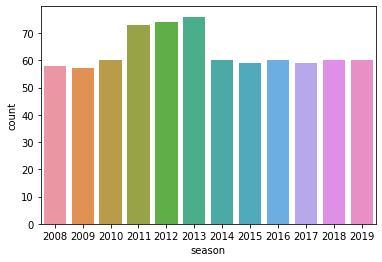

In [414]:
sns.countplot('season',data=matches)

### TOATAL NUMBER OF TEAMS 

In [415]:
matches["winner"].value_counts().index.value_counts().sum()

14

### WINNER SEASON WISE

In [416]:
final_match=matches.drop_duplicates(subset=['season'], keep='last')
final_match[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### TOTAL NUMBER OF WINNING TOSS BY EACH TEAM 

In [417]:
result(matches,"toss_winner")

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64
Total number of toss_winner are 14.


### TOSS WINNER IN EACH SEASON

In [418]:
matches.groupby("season")["toss_winner"].value_counts()

season  toss_winner                
2008    Rajasthan Royals               11
        Deccan Chargers                 9
        Kings XI Punjab                 8
        Mumbai Indians                  8
        Delhi Daredevils                6
                                       ..
2019    Mumbai Indians                  8
        Kings XI Punjab                 6
        Kolkata Knight Riders           5
        Royal Challengers Bangalore     4
        Sunrisers Hyderabad             4
Name: toss_winner, Length: 100, dtype: int64

### TOSS_DECISION

In [419]:
matches.toss_decision.value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

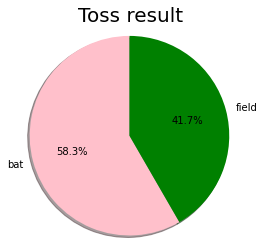

In [420]:
# we will plot pie chart on Toss decision
labels=np.array(Toss.index)
sizes = Toss.values
colors = ["pink","green"]
plt.figure(figsize = (4,4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

### WINNER BY TOSS DECISION

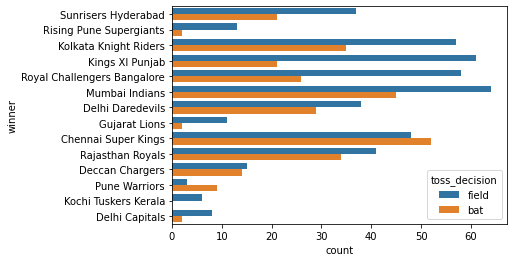

In [421]:
sns.countplot(y = 'winner',hue = 'toss_decision',data = matches)
plt.show()

### TOTAL NO OF WIN BY EACH TEAM

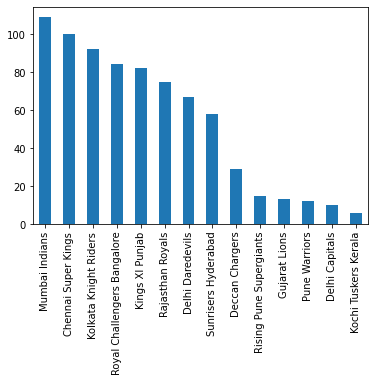

In [422]:
matches["winner"].value_counts().plot.bar()

## BATTING AND BOWLING
   - let make a new feature match "win_by". this feature is derive from "win_by_run" feature here choose
       - if 0 = Bat_first 
       - else Bowl_first

In [423]:
matches['win_by']=np.where(matches['win_by_runs']>0,'Bat first','Bowl first')
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,win_by
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Bat first
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Bowl first


In [424]:
matches["win_by"].value_counts()

Bowl first    419
Bat first     337
Name: win_by, dtype: int64

### WINNER BY CHOOSING BATTING AND BOWLING

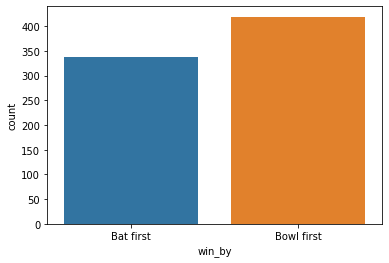

In [425]:
sns.countplot('win_by',data=matches)

###  FINAL MATCH WIN CONDITION ACCORDING TO TOSS RESULT

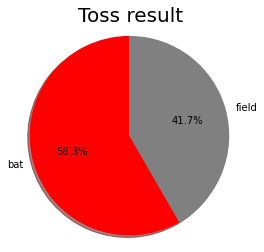

In [426]:
Toss=final_match.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['red', 'grey']
plt.figure(figsize = (4,4))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal',fontsize=10)
plt.show()

## TOTAL RUN

In [427]:
deliveries.groupby("batsman")["batsman_runs"].value_counts().sum()

179078

In [428]:
deliveries[["extra_runs","batsman_runs","penalty_runs","noball_runs","legbye_runs","bye_runs","is_super_over"]].sum().sort_values(ascending=False)

batsman_runs     223286
extra_runs        12004
legbye_runs        3785
bye_runs            884
noball_runs         749
is_super_over        81
penalty_runs         10
dtype: int64

## total number of  four 

In [429]:
four=(deliveries["batsman_runs"]==4).sum()
four

20392

## Total number of six

In [430]:
(deliveries["batsman_runs"]==6).sum()

8170

# TOP 10 BATSMAN

In [431]:
deliveries.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True).head(10)

,batsman,sum
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


## BY_FOUR

In [432]:
fours=deliveries[deliveries['batsman_runs']==4]
fours.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True).head(10)

,batsman,sum
0,S Dhawan,2104
1,SK Raina,1980
2,G Gambhir,1968
3,V Kohli,1928
4,DA Warner,1836
5,RV Uthappa,1744
6,RG Sharma,1724
7,AM Rahane,1620
8,CH Gayle,1504
9,PA Patel,1464


## BY_SIXES

In [433]:
sixes=deliveries[deliveries['batsman_runs']==6]
sixes.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True).head(10)

,batsman,sum
0,CH Gayle,1962
1,AB de Villiers,1284
2,MS Dhoni,1242
3,SK Raina,1170
4,RG Sharma,1164
5,V Kohli,1146
6,DA Warner,1086
7,SR Watson,1062
8,KA Pollard,1050
9,YK Pathan,966


## TOP 10 BOWLERS

In [434]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [439]:
deliveries_df['dismissal_kind']=deliveries_df['dismissal_kind'].fillna(missing)
#deliveries_df[deliveries_df['dismissal_kind']]

In [ ]:
matches["city"]=matches["city"].fillna("Dubai")

In [440]:
wicket=deliveries_df[deliveries['dismissal_kind']]
#wicket_data=Data.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]
wicket.groupby('bowler')['dismissal_kind'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True).head(10)

KeyError: ignored

In [ ]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

In [ ]:
deliveries.head(3)